Saved  →  pipeline_overview_compact.gif


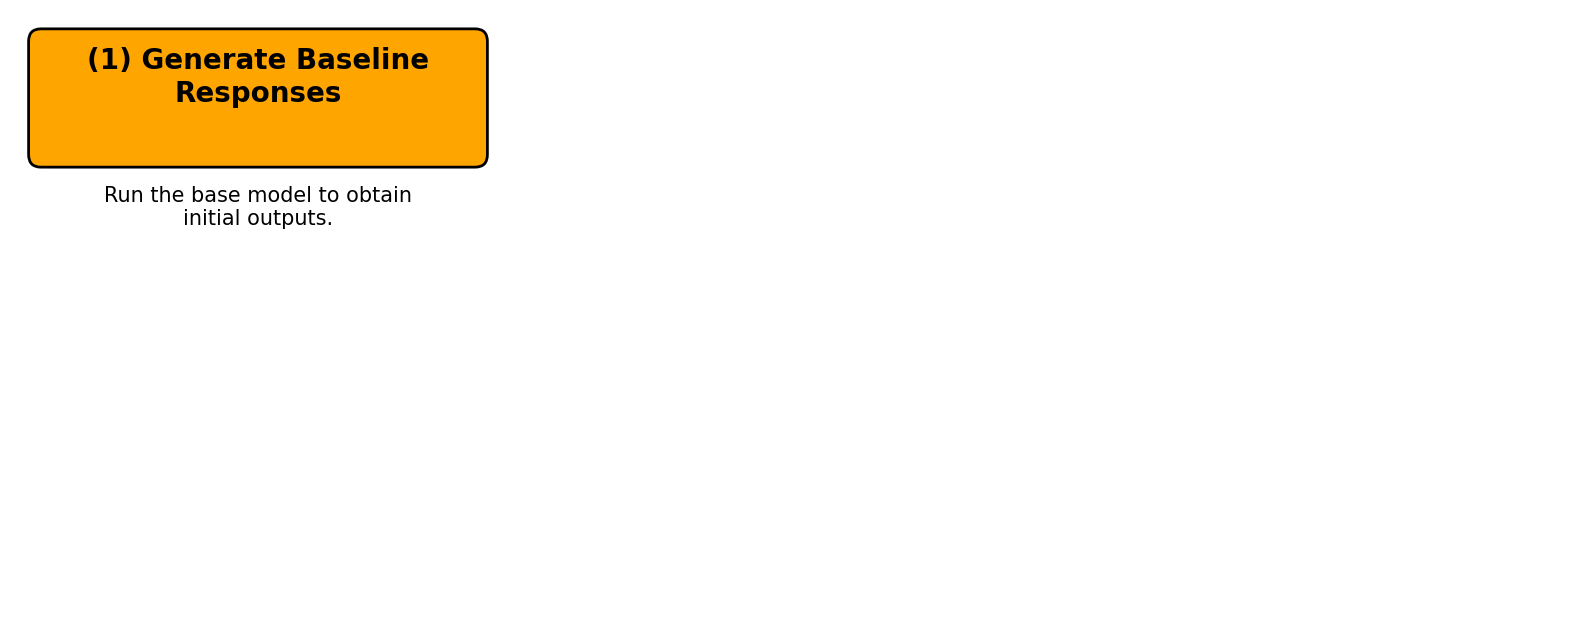

In [48]:
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from matplotlib.animation import FuncAnimation, PillowWriter

# ─────────────────────── 6 overview steps ───────────────────────
steps = [
    (
        "(1) Generate Baseline Responses",
        "Run the base model to obtain initial outputs."
    ),
    (
        "(2) Generate Perturbations",
        "Using RATE, create pairs where the perturbed response exhibits the "
        "target bias and the base response does not."
    ),
    (
        "(3) Label Training Data",
        "Identify which responses in a subset of the model's training data exhibit bias."
    ),
    (
        "(4) Generate Counterfactuals",
        "Select pairs where neither response shows the target bias. Then apply rewrite prompt to inject bias into the rejected response."
    ),
    (
        "(5) Sample Chatbot Arena Examples (Optional)",
        "Draw extra examples from a larger conversational corpus in proportion to the "
        "observed bias frequency, annotate them identically, and include them to guard "
        "against distribution shift."
    ),
    (
        "(6) Fine‑Tune",
        "Fine‑tune the base model on the union of generated counterfactuals and any "
        "supplementary samples."
    )
]

# ───────────── REDUCED spacing parameters ─────────────
rect_w, rect_h = 7.0, 1.8      # slightly smaller boxes
h_gap, v_gap   = 8.5, 6        # tighter spacing
title_wrap     = 28            # tighter text wrapping
blurb_offset   = 0.5           # closer blurb text
fps            = 0.75             # 1 frame/sec

def grid(i):
    """3 columns on row‑0, 3 on row‑1."""
    row = 0 if i < 3 else 1
    col = i if row == 0 else i - 3
    return col * h_gap, v_gap * (1 - row), row

# ───────────────────── SMALLER figure size ─────────────────────
fig, ax = plt.subplots(figsize=(20, 8))  # reduced from 28x12
ax.axis("off")

def draw(frame_idx):
    ax.clear()
    ax.axis("off")
    
    # Keep final figure bounds throughout - calculate based on all 6 boxes
    all_positions = [grid(i) for i in range(6)]
    all_xs = [pos[0] for pos in all_positions]
    all_ys = [pos[1] for pos in all_positions]
    
    min_x = min(all_xs) - 0.5
    max_x = max(all_xs) + rect_w + 0.5
    min_y = min(all_ys) - blurb_offset - 1
    max_y = max(all_ys) + rect_h + 0.5
    
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    for i in range(frame_idx + 1):
        title, blurb = steps[i]
        x, y, row = grid(i)

        # ---- box ----
        ax.add_patch(FancyBboxPatch((x, y), rect_w, rect_h,
                                    boxstyle="round,pad=0.2",
                                    facecolor="#FFA500",
                                    linewidth=2.0, zorder=2))

        # ---- consistent text sizing (much larger) ----
        ax.text(x + rect_w/2, y + rect_h*0.68,
                "\n".join(textwrap.wrap(title, 25)),
                ha="center", va="center", fontsize=20,
                weight="bold", zorder=3)
        ax.text(x + rect_w/2, y - blurb_offset,
                textwrap.fill(blurb, 35),
                ha="center", va="top", fontsize=15, zorder=3)

        # ---- arrows ----
        if i < frame_idx:
            nx, ny, nrow = grid(i + 1)

            # ── CASE 1: same row (straight horizontal) ──
            if row == nrow:
                ax.add_patch(FancyArrowPatch((x + rect_w, y + rect_h/2),
                                             (nx,        ny + rect_h/2),
                                             arrowstyle="->",
                                             linewidth=2,
                                             mutation_scale=18,  # slightly smaller arrows
                                             zorder=1))
            # ── CASE 2: top‑row → bottom‑row (special diagonal) ──
            elif i == 2 and frame_idx >= 3:
               pass
            # ── CASE 3: any other wrap‑down (fallback) ──
            else:
                mid_y = y - (v_gap - rect_h)/2
                ax.add_patch(FancyArrowPatch((x + rect_w, y + rect_h/2),
                                             (x + rect_w, mid_y),
                                             arrowstyle="-",
                                             linewidth=2, zorder=1))
                ax.add_patch(FancyArrowPatch((x + rect_w, mid_y),
                                             (nx, ny + rect_h/2),
                                             arrowstyle="->",
                                             linewidth=2,
                                             mutation_scale=18,
                                             zorder=1))

# build + save
ani = FuncAnimation(fig, draw,
                    frames=len(steps),
                    interval=1000/fps,
                    repeat=False)

# Save the animation
ani.save("pipeline_overview_compact.gif", writer=PillowWriter(fps=fps))
print("Saved  →  pipeline_overview_compact.gif")